In [4]:
import os
import time 
import math
import pickle
import struct
import csv
import numpy as np
import matplotlib.pyplot as plt 
import xgboost as xgb
import threading
from multiprocessing import Pool, sharedctypes
import warnings
import gc
import sys
sys.path.append('/disk3/zk/aboutoil/Shengli/Shengli_update/project')  

from Configure.global_config import file_loc_gl

filepath = os.getcwd()
mainpath = "/disk3/zk/aboutoil/Shengli/"

In [12]:
class Xgboost_Predictor:
    """
    Predictor of Xgboost
    """
    def __init__(self):
        """
        Predictor constructer.
        """
#         self.model_path = os.path.join(filepath, "models/models_weight/binary_xgboost/binary_xgboost.model")
        self.model_path="/disk3/zk/aboutoil/Shengli/Shengli_update/project/models/models_weight/binary_xgboost/binary_xgboost.model"
        init_params = {
                    "nthread":30
                        }
        if os.path.exists(self.model_path):
            self.model = xgb.Booster(params = init_params, model_file=self.model_path)
        else:
            print("model doesn't exist! please train xgboost model.")

    def plane_predict(self):
        """
        predict plane data.
        """
#         data = read_plane_data()
#         np.save(os.path.join(FileConfig.plane_savepath,"plane_data.npy"), data)
        data=np.load('/disk3/Shengli/data/backup/plane_loc/plane_data.npy')
        print("predict...")
        xg_data = xgb.DMatrix(data)
        pred = self.model.predict(xg_data)
#         pred = np.reshape(pred, newshape=(DataConfig.line_nb, DataConfig.trace_nb))
        pred = np.reshape(pred, newshape=(1641, 664))

#         os.chdir(FileConfig.predict_result_filepath)
        np.save("./plane_result.npy", pred)

#         filename = FileConfig.plane_filepath.split("/")[-1]
        plane_file_path="/disk3/zk/aboutoil/Shengli/data/plane_loc/ng32sz_grid_28jun_154436.p701"
        filename = plane_file_path.split("/")[-1]
        plt.imshow(pred)
        plt.savefig("{}_predict_plane.png".format(filename))

#     def lines_predict(self, line_data, lines_block):
#         """
#         predict lines data.
#         line_data: input
#         lines_block: number of lines
#         """
#         line_data = np.reshape(line_data[0:lines_block], newshape=(lines_block * DataConfig.trace_nb * DataConfig.time_nb, DataConfig.feature_nb))
#         xg_data = xgb.DMatrix(line_data)
#         pred = self.model.predict(xg_data)
#         pred = np.reshape(pred, newshape=(lines_block, DataConfig.trace_nb, DataConfig.time_nb))

#         del line_data
#         del xg_data
#         gc.collect()

#         return pred


predict...


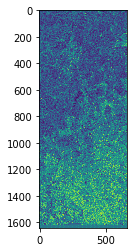

In [13]:
predict = Xgboost_Predictor()
predict.plane_predict()

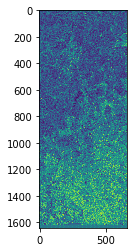

In [17]:
ny=np.load("plane_result.npy")
plt.imshow(ny)